In [1]:
import pandas, numpy
from novelty_experiment_runner_cartpole import NoveltyExperimentRunnerCartpole
from os import path
import settings
import constants
import seaborn as sns
import matplotlib.pyplot as plt

importing local settings
import error!!!!


### Novelty experiment
- Novelty: {gravity: 12}
- Number of trials = 10
- trial structure = [5 non-novelty-performance, 10 known-novelty, 10 unknown-novelty]

In [7]:
results_file_2 = open(path.join(settings.ROOT_PATH, "data", "cartpole", "experiments_0521", "gravity_12_10_5_10.csv"), "r")
dataframe2 = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_2))


In [8]:
dataframe2

,Unnamed: 0,trial_num,episode_num,type,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,novelty_id,level,env_config,is_novel,TN,FP,TP,FN
0,0,0,0,non-novelty-performance,0.793077,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
1,0,0,1,non-novelty-performance,0.871358,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
2,0,0,2,non-novelty-performance,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,1,0,0
3,0,0,3,non-novelty-performance,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,1,0,0
4,0,0,4,non-novelty-performance,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,9,10,known-novelty,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
246,0,9,11,known-novelty,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
247,0,9,12,known-novelty,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
248,0,9,13,known-novelty,1.000000,0.999999,0,nothing,1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0


In [9]:
trials,cdt = NoveltyExperimentRunnerCartpole.get_trials_summary(dataframe2)
print(trials)
print(cdt)

                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           0   3   2  20       0.9640   False
           1           0   4   1  20       0.9360   False
           2           0   3   2  20       0.8918   False
           3           0   0   5  20       0.9860    True
           4           0   3   2  20       0.9662   False
           5           0   5   0  20       0.9910   False
           6           0   2   3  20       0.9950   False
           7           0   4   1  20       0.9968   False
           8           0   4   1  20       0.9518   False
           9           0   5   0  20       0.9990   False
                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        3           0   0   5  20        0.986    True


In [10]:
M1, M2, M21 = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt, trials)
print("M1: {}".format(M1))
print("M2: {}".format(M2))
print("M21: {}".format(M21))

M1: 0.0
M2: 0.1
M21: 0.1


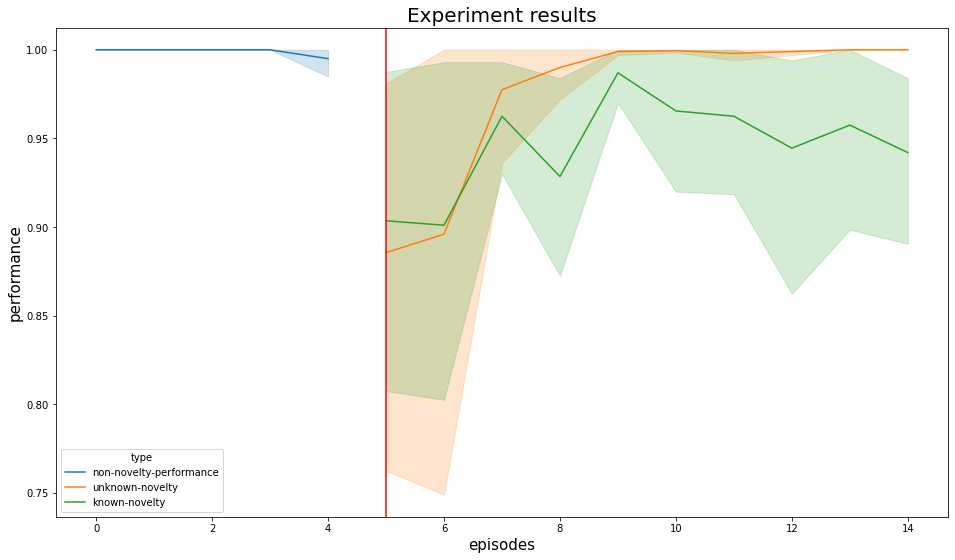

In [11]:
NoveltyExperimentRunnerCartpole.plot_experiment_results(dataframe2, 5)

In [12]:
results_file_l3 = open(path.join(settings.ROOT_PATH, "data", "cartpole", "experiments_0521", "length_3_10_5_10.csv"), "r")
df_l3 = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_l3))


In [14]:
trials_l3,cdt_l3 = NoveltyExperimentRunnerCartpole.get_trials_summary(df_l3)
print(trials_l3)
print(cdt_l3)

                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           0   4   1  30     0.864429   False
           1           0   0   5  30     0.953286    True
           2           0   5   0  30     0.726143   False
           3           0   3   2  30     0.765286   False
           4           0   2   3  30     0.869143   False
           5           0   5   0  30     0.634714   False
           6           0   5   0  30     0.809000   False
           7           0   0   5  30     0.773857    True
           8           0   0   5  30     0.827286    True
           9           2   4   1  28     0.875571   False
                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        1           0   0   5  30     0.953286    True
           7           0   0   5  30     0.773857    True
           8           0   0   5  30     0.827286    True


In [15]:
M1_l3, M2_l3, M21_l3 = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt_l3, trials_l3)
print("M1: {}".format(M1_l3))
print("M2: {}".format(M2_l3))
print("M21: {}".format(M21_l3))

M1: 0.0
M2: 0.3
M21: 0.1


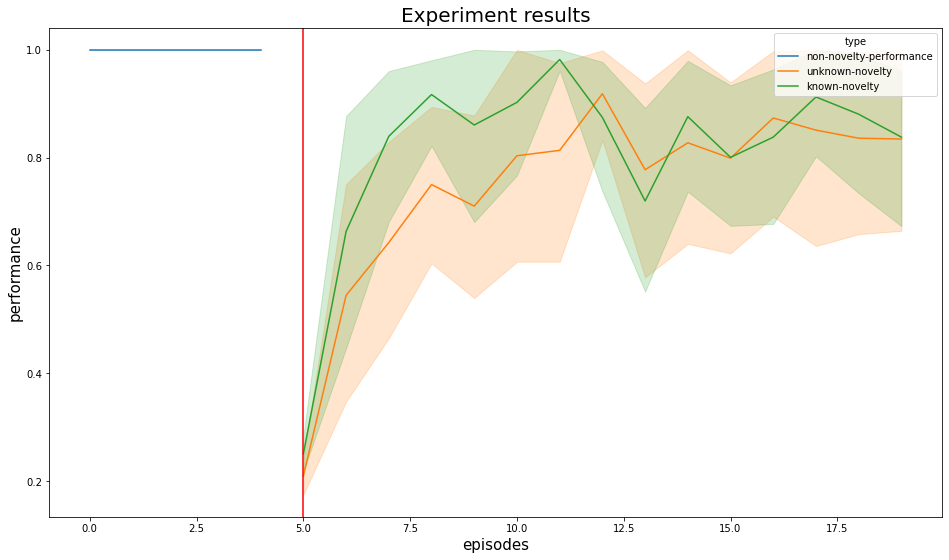

In [16]:
NoveltyExperimentRunnerCartpole.plot_experiment_results(df_l3, 5)

### Updated novelty detection code

Using repairs for detection

Novelty = {gravity: 12}

In [9]:
file_g12_nr = open(path.join(settings.ROOT_PATH, "data", "cartpole", "experiments_0521", "gravity_12_3_3_5_repair_detection_incorrect.csv"), "r")
df_g12_nr = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(file_g12_nr))


KeyError: 'episode_type'

In [10]:
df_g12_nr

NameError: name 'df_g12_nr' is not defined

In [23]:
trials_g12_nr,cdt_g12_nr = NoveltyExperimentRunnerCartpole.get_trials_summary(df_g12_nr)
print(trials_g12_nr)
print(cdt_g12_nr)

                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           5   0   3   5     0.966923    True
           1           5   0   3   5     1.000000    True
           2           5   0   3   5     0.999615    True
                      FN  FP  TN  TP  performance  is_CDT
novelty_id trial_num                                     
0.0        0           5   0   3   5     0.966923    True
           1           5   0   3   5     1.000000    True
           2           5   0   3   5     0.999615    True


In [24]:
M1_g12_nr, M2_g12_nr, M21_g12_nr = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt_g12_nr, trials_g12_nr)
print("M1: {}".format(M1_g12_nr))
print("M2: {}".format(M2_g12_nr))
print("M21: {}".format(M21_g12_nr))

M1: 5.0
M2: 1.0
M21: 0.3333333333333333


In [ ]:
file_g12_nr = open(path.join(settings.ROOT_PATH, "data", "cartpole", "experiments_0521", "gravity_12_3_3_5_repair_detection.csv"), "r")
df_g12_nr = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(file_g12_nr))

# Updated experiment setup

## Novelty {gravity: 12}

In [2]:
file_g12_ue = open(path.join(settings.ROOT_PATH, "data", "cartpole", "experiments_0521", "gravity_12_5_5_10.csv"), "r")
df_g12_ue = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(file_g12_ue))
df_g12_ue

,Unnamed: 0,trial_num,episode_num,trial_type,episode_type,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,novelty_id,level,env_config,is_novel,TN,FP,TP,FN
0,0,0,0,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
1,0,0,1,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
2,0,0,2,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
3,0,0,3,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
4,0,0,4,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,4,10,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
146,0,4,11,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
147,0,4,12,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
148,0,4,13,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0


In [3]:
trials_g12_ue, cdt_g12_ue = NoveltyExperimentRunnerCartpole.get_trials_summary(df_g12_ue)

In [4]:
trials_g12_ue

FN  FP  TN  TP  performance  is_CDT
trial_type novelty_id trial_num                                     
known      0.0        0           0   0   5  10     0.993667    True
                      1           0   0   5  10     1.000000    True
                      2           0   0   5  10     0.991000    True
                      3           0   0   5  10     1.000000    True
                      4           0   0   5  10     1.000000    True
unknown    0.0        0          10   0   5   0     1.000000   False
                      1           6   0   5   4     0.989000    True
                      2          10   0   5   0     1.000000   False
                      3          10   0   5   0     0.991667   False
                      4          10   0   5   0     1.000000   False

In [10]:
scores_g12 = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt_g12_ue, trials_g12_ue)
scores_g12

,M1,M2
trial_type,,
known,0,1.0
unknown,6,0.2


M21 is 0 here because there are no trial with false positives.

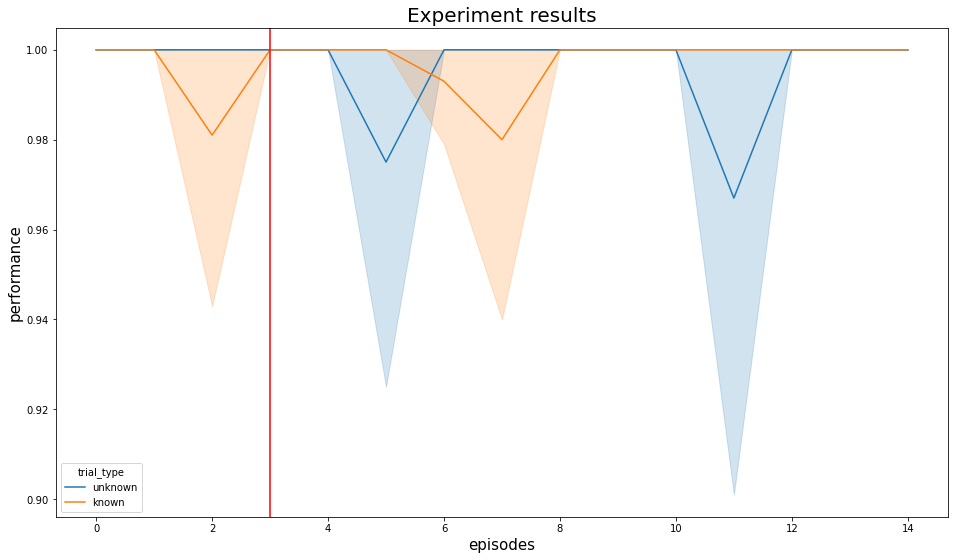

In [7]:
NoveltyExperimentRunnerCartpole.plot_experiment_results(df_g12_ue, 3)

## Novelty {gravity: 7}

In [8]:
file_g7_ue = open(path.join(settings.ROOT_PATH, "data", "cartpole", "experiments_0521", "gravity_7_5_5_10.csv"), "r")
df_g7_ue = NoveltyExperimentRunnerCartpole.categorize_examples_for_novelty_detection(pandas.read_csv(file_g7_ue))
df_g12_ue

,Unnamed: 0,trial_num,episode_num,trial_type,episode_type,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,novelty_id,level,env_config,is_novel,TN,FP,TP,FN
0,0,0,0,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
1,0,0,1,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
2,0,0,2,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
3,0,0,3,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
4,0,0,4,unknown,non-novelty-performance,0.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,4,10,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
146,0,4,11,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
147,0,4,12,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0
148,0,4,13,known,novelty,1.0,0.999999,0,{},1.0,0.0,2.0,{'gravity': 12},True,0,0,1,0


In [9]:
trials_g7_ue, cdt_g7_ue = NoveltyExperimentRunnerCartpole.get_trials_summary(df_g7_ue)
trials_g7_ue

FN  FP  TN  TP  performance  is_CDT
trial_type novelty_id trial_num                                     
known      0.0        0           0   0   5  10     0.968667    True
                      1           0   0   5  10     0.965667    True
                      2           0   0   5  10     0.991333    True
                      3           0   0   5  10     0.990333    True
                      4           0   0   5  10     0.982333    True
unknown    0.0        0           0   0   5  10     0.996333    True
                      1           7   0   5   3     0.990667    True
                      2           1   0   5   9     0.991000    True
                      3           8   0   5   2     0.982333    True
                      4           4   0   5   6     0.984000    True

In [11]:
scores_g7 = NoveltyExperimentRunnerCartpole.get_program_metrics(cdt_g7_ue, trials_g7_ue)
scores_g7

,M1,M2
trial_type,,
known,0,1.0
unknown,4,1.0


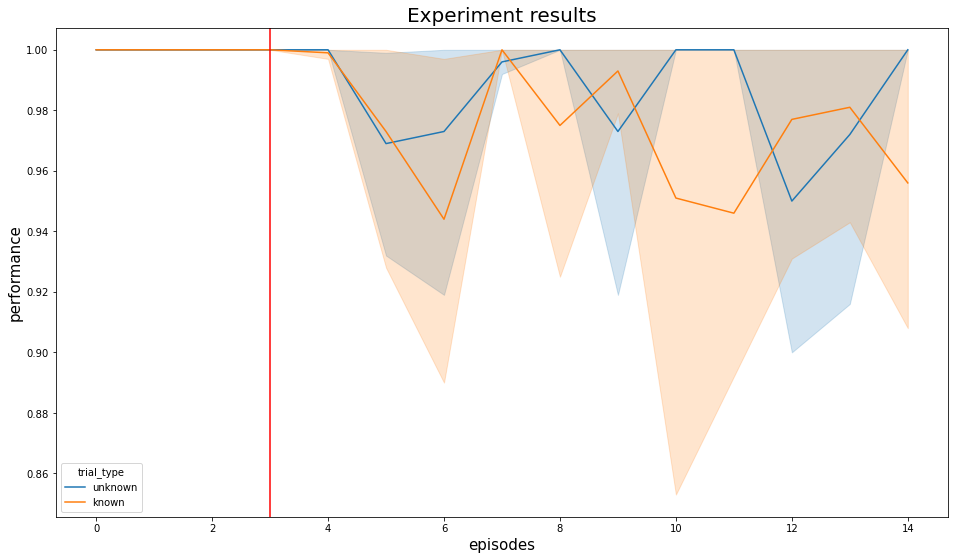

In [12]:
NoveltyExperimentRunnerCartpole.plot_experiment_results(df_g7_ue, 3)